In [1]:
from simulations import *
# here we first call function for generating random 1000 random sequences where we will mutate each one of them with 0-0.3 error rate.
# !rm -rf simulations 
!mkdir simulations_chr
!mkdir simulations_chr/fas/
path = r'simulations_chr/fas/'
generate_sequences(path, chr_ = '>chr1')

mkdir: cannot create directory ‘simulations_chr’: File exists
mkdir: cannot create directory ‘simulations_chr/fas/’: File exists
>chr1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
2

In [3]:
# now we call biser search, there is special mode for this simulation for speed purposes
import os
# !module load samtools
path = r'simulations_chr/fas/'

for i in os.listdir(path):
    !echo '{path}/{i}'
    !/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx512/Core/samtools/1.11/bin/samtools faidx '{path}/{i}'
!mkdir simulations_chr/seeds/
!seqc new_sedef_6.seq -m 1 simulations_chr/fas/ simulations_chr/seeds/

/home/hiseric1/.local/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(-m, 1)]
[simulations_chr/fas/, simulations_chr/seeds/]
[simulations_chr/fas/, simulations_chr/seeds/]
pair:  (simulations_chr/fas/1.fa, simulations_chr/fas/1_sds.fa)
Finding SDs...
whole code took 0.000562452s
IOError: file simulations_chr/fas/1.fa.fai could not be opened

raised from: __init__
/project/home/hiseric1/.seq/lib/seq/stdlib/core/file.seq:13:13


In [1]:
!mkdir  simulations_chr/merged/
!/home/hiseric1/new_sedef/sedef/sedef merge simulations_chr/seeds/ simulations_chr/merged/

🍁  🐚    SEDEF 1.1-34-g09e65b7-dirty; arguments:  (SSE4.1) /home/hiseric1/new_sedef/sedef/sedef merge simulations_chr/seeds/ simulations_chr/merged/
Done merging filesimulations_chr/seeds/


In [2]:
!cat simulations_chr/fas/*.fa > simulations_chr/main_fa.fa
!/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx512/Core/samtools/1.11/bin/samtools faidx 'simulations_chr/main_fa.fa'
    

In [4]:
!./align.sh simulations_chr simulations_chr/main_fa.fa simulations_chr/main_fa.fa


Align time: 11:12.26
Single-core running time: 1 hours (5785.74 seconds)
Memory used: 69 MB


In [1]:
from simulations import *
path1 = 'simulations_chr/main_fa.fa.fai'
path2 = 'simulations_chr/aligned/'
output = 'simulations_chr/output.txt'
threshold = 0.9
calculate_coverages(path1, path2, threshold, output)
print ('Done calculating')

{26: 981, 30: 900, 14: 1000, 17: 1000, 13: 1000, 22: 994, 24: 987, 15: 998, 19: 997, 3: 1000, 7: 1000, 9: 1000, 25: 993, 10: 1000, 4: 1000, 8: 1000, 18: 999, 16: 1000, 28: 959, 1: 1000, 29: 958, 11: 1000, 21: 989, 2: 1000, 5: 1000, 23: 988, 12: 1000, 27: 968, 20: 997, 6: 1000} 31637
Done calculating


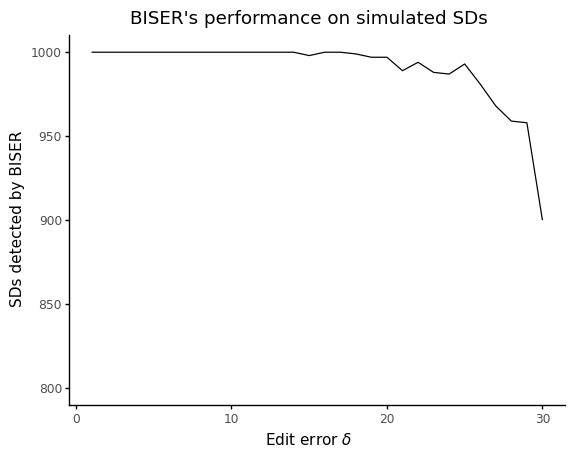

<ggplot: (8738310588489)>

In [3]:
import pandas as pd
from plotnine import *

df = pd.read_csv(output, sep=';', index_col=False)
# print (df)
(ggplot(df, aes(x='error', y='hits')) +
 geom_line() + 
 ylim(800,1000) +
 labs(x = u"Edit error $\delta$", y="SDs detected by BISER", title="BISER's performance on simulated SDs") +
 theme_classic() +
 theme(text=element_text(family=['Helvetica']))
)